# The Biometric Analysis Notebook 
(<sub><sup>that you can probably already do in excel)

### Overview
This is a notebook that reads data from a couple of CSV files that contain my biometric data. I either export these CSVs from my Garmin Connect account or I manually track my weight and sleep metrics to it's own CSV. I'm not looking to learn anything groundbreaking about my health and fitness but I am hoping to practice my Python data analytic skills!

### End Goal
- A single notebook containing Calorie Analysis, Heart Rate Analysis, Steps Analysis, Sleep Analysis, Weight Analysis,  + any correlations I can think of.
- Prettify with Seaborn maybe?
- Selenium to download the CSV files and place in appropriate folders (maybe)
- Convert to a python script that does everything with a single double click ?
- API access (maybe $$?)
- A script that collates a monthly report? Yearly? 

### To do list
- Comment why the code is written a particular way, not what it does
General:
- Seaborn?
- How do I turn this into a python script where it calculates everything for me by running it and printing to the CMD? Can it generate a pdf report instead?
  - Assuming all the right CSVs are in their appropriate folder. 
  - Does this need to be in one giant script?
  - Save/Download to PDF?
- Selenium to pull the scripts for me automatically?
- API does exist $$?
- Correlations
- Neaten up the code up like a lot
- Manually track weight, calories consumed and sleep?

##  Starting with the basics - 

In [1]:
# Importing all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# What week is it? This variable is used in graph titles so update this before running:
week = 47

# Many try statements are written so that I could specify which CSV file was missing if there was an error

# Steps
try:
    steps = pd.read_csv(f'Week {week}/Steps.csv')

    # I'm not happy with the existing columns so I rename them
    new_column_names = ['Date', 'Actual', 'Goal']
    
    # Checking the number of new column names matches the number of columns in the DataFrame for good measure
    if len(new_column_names) == len(steps.columns):
        steps.columns = new_column_names
    else:
        print("Error: The number of new column names does not match the number of columns in the DataFrame")

    # Set 'Date' as the index so that when I'm visualizing it later, the xticks become the actual 'Date' rather than the 0, 1, 2 etc
    steps.set_index('Date', inplace=True)
    
except FileNotFoundError:
    print("Steps.csv was not found.")


# Calories
try:
    calories = pd.read_csv(f'Week {week}/Calories.csv')

    # Also not happy with the given column names
    new_column_names = ['Date', 'Active Calories', 'Resting Calories', 'Total']
    
    # Ensure the number of new column names matches the number of columns in the DataFrame
    if len(new_column_names) == len(calories.columns):
        calories.columns = new_column_names
    else:
        print("Error: The number of new column names does not match the number of columns in the DataFrame")

    # Set 'Date' as the index so that xticks become the 'Date' rather than the 0, 1, 2 etc index.
    calories.set_index('Date', inplace=True)
    
except FileNotFoundError:
    print("Calories.csv was not found.")


# Activity
try: # The first row is skipped because the CSV file exported has garbage data in the first row
    activity = pd.read_csv(f'Week {week}/Activity Calories.csv', skiprows=[0])

    # New column names.. again
    new_column_names = ['Day', 'Activity Type', 'Value']
    
    # Ensure the number of new column names matches the number of columns in the DataFrame
    if len(new_column_names) == len(activity.columns):
        activity.columns = new_column_names
    else:
        print("Error: The number of new column names does not match the number of columns in the DataFrame")

    # Replace 'Fitness Equipment' with 'Gym Cardio' in the 'Activity Type' column because Fitness Equipment is not an activity
    activity['Activity Type'] = activity['Activity Type'].replace('Fitness Equipment', 'Gym Cardio')

except FileNotFoundError:
    print("Activity Calories.csv was not found.")

# try:
#     heart_rate = pd.read_csv(f'Week {week}/HeartRate.csv')
# except FileNotFoundError:
#     print("HeartRate.csv was not found.")

# Sleep and weight which has to be manually tracked
try:
    ManualTracking = pd.read_csv(f'Week {week}/ManualTracking.csv')

    # Set 'Date' as the index so that when I'm visualizing it later, the xticks become the actual 'Date' rather than the 0, 1, 2 etc
    ManualTracking.set_index('Day', inplace=True)

    # Drop 'Weight' to keep sleep data and make a new df called sleep
    sleep = ManualTracking.drop('Weight', axis=1) # axis=1 specifies that you want to drop a column, not a row.
    
    # Drop 'Total Sleep' and 'REM' to keep weight data and make a new df called weight
    weight = ManualTracking.drop(['Total Sleep', 'REM'], axis=1) # axis=1 specifies that you want to drop a column, not a row.  
    
except FileNotFoundError:
    print("ManualTracking.csv was not found.")

# Step Analysis
### Questions
- How many total steps this week? 
- How many kms does this equal to? (See 'Total Distance')
- What is the average daily steps? 
## Calculations

In [2]:
# Average steps each day
average_steps = round(steps['Actual'].mean(), 1)

# Total Steps for the week
total_steps = round(steps['Actual'].sum(), 1)

# Total target steps for the week
total_target_steps = round(steps['Goal'].sum(), 1)

# Calculate percentage of actual vs goal
step_percentage = round((total_steps / total_target_steps) * 100, 1)

# This description is used in the fig graphed later on
step_description = f'My average step count was {int(average_steps)} steps per day this week. \n\nAccumulating to a total of {total_steps} steps. \n\nYou achieved {step_percentage}% of your total step goal for the week.'
#print(step_description)

## Visualizations

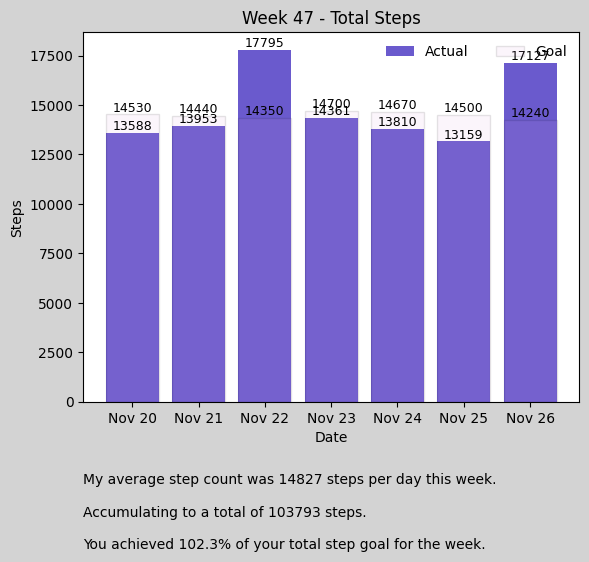

In [3]:
# Rename the dataframe for easy usage
df = steps

# Plotting the bars
fig, ax = plt.subplots()

# Positions of the bar groups
bar_positions = np.arange(len(df))

# Plotting Actual and Goal data
ax.bar(bar_positions, df['Actual'], label='Actual', alpha=1, color='slateblue')
ax.bar(bar_positions, df['Goal'], label='Goal', alpha=0.1, color='plum', edgecolor='black')

# Annotating bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height, '{:.0f}'.format(height), ha='center', va='bottom', size=9)

# Setting the background color
fig.set_facecolor('lightgrey')
ax.set_facecolor('white')

# Customizing the legend, labels, and title
ax.legend(loc='upper right', frameon=False, ncol=2)
ax.set_xlabel('Date', color='black')
ax.set_ylabel('Steps', color='black')
ax.set_title(f'Week {week} - Total Steps', color='black')

# ax.set_xticks(bar_positions) puts index[0] at the first bar, rather than ON the y-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels(df.index)

ax.annotate(step_description,
            xy = (0.0, -0.3),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=10)

# This does show the fig/ax but also removes all the weird text that appears
plt.show()

# Calories Analysis
## Questions
- How many average calories am I burning each day?
- Stacked bar chart: resting vs active calories each day = total each day
- What is the total number of calories I'm burning each week?
- Weekly Avg Active + Weekly Avg Resting = Weekly AVg Total e.g 1090 Weekly Avg Active + 21-6 Weekly Avg Resting = 3196 Weekly Avg Total
- Error handling for Activity Type where Day is out of order - maybe a switch statement to reorder the graph if the data is missing a particular day?

## Calculations

In [4]:
# On average, how many calories am I burning each day?
average_daily_calories = round(calories['Total'].mean(), 1)

# How many average ACTIVE calories am I burning each day?git
average_active_calories = int(round(calories['Active Calories'].mean(), 0))

# How many average RESTING calories am I burning each day?
average_resting_calories = int(round(calories['Resting Calories'].mean(), 0))

# What is the total number of calories I'm burning each week?
total_calories_burnt = round(calories['Total'].sum(), 1)

# This description is used in the fig graphed later on
calorie_description = f'You burnt a total of {total_calories_burnt} calories this week. On average, that is about {int(average_daily_calories)} per day. \n\nTypically, {average_active_calories} of those calories were actively burnt and {average_resting_calories} were burnt resting.'

## Visualizations

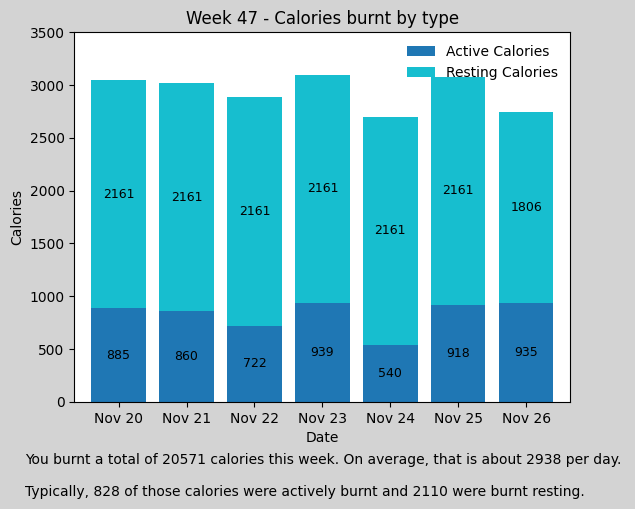

In [5]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

# Rename the dataframe for easy usage
df = calories

# Ignore 'Total' calories for the sake of the graph
df_without_total = df.drop('Total', axis=1) # axis=1 specifies that you want to drop a column, not a row.

# Stacked bar chart - https://matplotlib.org/stable/users/explain/colors/colormaps.html
ax = df_without_total.plot(kind='bar', stacked=True, colormap='tab10', width=0.8)

# Add the value of calories to each bar:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', 
            size=9)

# Set the background color of the entire figure
fig = plt.gcf()
fig.set_facecolor('lightgrey')

# Set the color of the graph itself
ax.set_facecolor('white')

# Edit the legend
ax.legend(loc='upper right', frameon=False)#, ncol=3)

# Label axis'
plt.xlabel('Date', color='black')
plt.ylabel('Calories', color='black')
plt.title(f'Week {week} - Calories burnt by type', color='black')

# Customize x, y ticks
plt.xticks(rotation=0, color='black')

# Customize y-axis to display every 500 calories
max_calories = df_without_total.sum(axis=1).max()  # Find the maximum sum of calories
ytick_values = range(0, int(max_calories) + 500, 500)  # Create a range of values from 0 to max, stepping by 500
plt.yticks(ytick_values, color='black')

ax.annotate(calorie_description,
            xy = (-0.1, -0.2),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=10)

# Show me the dam thing
plt.show()

# Activity Analysis
## Questions

- Stacked bar chart of calories by day and activity type
- How many calories do I burn by activity type on average?
- See 'Total Activity Time' correlate Time vs Calorie Burn, what is more time effective?

## Calculations

In [14]:
# How many calories do I burn by activity type on average?
average_calories_by_type = round(activity.groupby('Activity Type')['Value'].mean(), 0)

# What is the average number of calories I burn at the gym?
average_gymcardio_calorie = int(round(average_calories_by_type.iloc[0]))

# What is the average number calories I burn on my walks?
average_walking_calorie = int(round(average_calories_by_type.iloc[2]))

# This description is used in the fig graphed later on
activity_description = f'On average, you burnt {average_gymcardio_calorie} calories at the gym and {average_walking_calorie} walking each day.'

## Visualizations

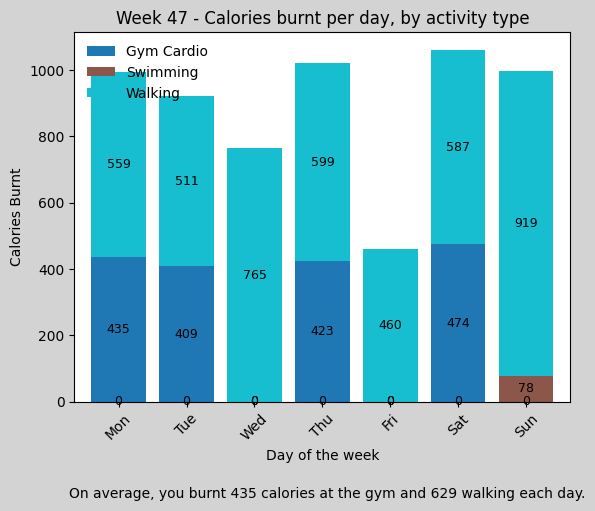

In [15]:
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

# Rename the dataframe for easy usage
df = activity

# Group the dataframe by the 'Day' and 'Activity Type' columns, then sum the values and unstack.
grouped = df.groupby(['Day','Activity Type']).sum()['Value'].unstack()

# Reorder bars
order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']

# Stacked bar chart - https://matplotlib.org/stable/users/explain/colors/colormaps.html
ax = grouped.loc[order].plot(kind='bar', stacked=True, colormap='tab10', width=0.8)

# Set the background color of the entire figure
fig = plt.gcf()
fig.set_facecolor('lightgrey')

# Set the color of the graph itself
ax.set_facecolor('white')

# Edit the legend
ax.legend(loc='upper left', frameon=False)# ncol=2)

# Label axis
plt.xlabel('Day of the week', color='black')
plt.ylabel('Calories Burnt', color='black')
plt.title(f'Week {week} - Calories burnt per day, by activity type', color='black')

# Customize x ticks
plt.xticks(rotation=45, color='black')

# Customize y ticks - Calculate the maximum y value (max calories)
max_calories = grouped.sum(axis=1).max()  # Max sum of calories for any day

# Create a list of y-ticks at 500 calorie intervals
yticks = range(0, int(max_calories) + 500, 500)
plt.yticks(color='black')

# Add the value of calories to each bar:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', 
            size=9)

ax.annotate(activity_description,
            xy = (1.03, -0.25),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

# Show me the dam thing
plt.show()

# Sleep Analysis
## Questions
Data has to be manually recorded.
- Average nightly sleep duration? Score?
- Quality, REM duration, Deep duration, Awake duration

## Calculations

In [8]:
# Calculation Code







# Visualizations

In [9]:
# Visualization Code

# Weight Analysis
## Questions
Data has to be manually recorded.
- Plot weight each day 

## Calculations

In [10]:
# # Calculation Code
# print(weight)

# # Difference in weight from start to end:
# start_weight = weight['Weight'].iloc[0]
# finish_weight = weight['Weight'].iloc[-1]

# if (start_weight > finish_weight):
#     weight_lost = start_weight - finish_weight
#     print(f'You have lost {round(weight_lost, 1)}g weight') 
    
# elif (start_weight == finish_weight):
#     print('No weight gained or lost this week')
# else:
#     weight_gain = start_weight - finish_weight
#     print(f'You have gained weight{round(weight_gain, 1)}g')



## Visualizations

In [11]:
# Visualization Code

# weight.plt.bar('Day', 'Weight')
# plt.show()

# Heart Rate Analysis
## Questions
- Resting Heart Rate
- Max Heart Rate Each day

## Calculations


In [12]:
# Calculation Code

## Visualizations

In [13]:
# Visualization Code